In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 38.2 MB/s eta 

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from pycaret.regression import *
setup = setup(data, target='charges', remove_outliers='True')

,Description,Value
0,Session id,1453
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1291, 10)"
5,Transformed train set shape,"(889, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [4]:
from pycaret.regression import *
setup = setup(data, target='charges', normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,7388
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [5]:
setup.dataset_transformed.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
1052,0.673913,1.0,0.373150,0.2,0.0,1.0,0.0,0.0,0.0,9288.026367
457,0.847826,0.0,0.391041,0.0,0.0,0.0,1.0,0.0,0.0,11840.775391
189,0.239130,0.0,0.434490,0.4,0.0,0.0,1.0,0.0,0.0,4922.916016
377,0.130435,1.0,0.650794,0.0,1.0,0.0,0.0,1.0,0.0,38126.246094
679,0.673913,0.0,0.194243,0.4,0.0,0.0,1.0,0.0,0.0,10156.783203


In [6]:
from pycaret.regression import *
setup = setup(data, target='charges', train_size=0.8)
compare = compare_models(sort='R2')

,Description,Value
0,Session id,4675
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2615.9519,22329079.2922,4675.9737,0.8421,0.4285,0.2982,0.3000
catboost,CatBoost Regressor,2817.0907,24836169.7597,4933.3166,0.8245,0.4714,0.3271,1.3670
lightgbm,Light Gradient Boosting Machine,2949.6041,24815709.0326,4941.0713,0.8244,0.5681,0.3691,0.3670
rf,Random Forest Regressor,2798.4750,25126860.3244,4972.5063,0.8233,0.4667,0.3323,0.4620
ada,AdaBoost Regressor,4113.6883,28031043.3613,5267.6529,0.8029,0.6237,0.7053,0.2020
et,Extra Trees Regressor,2760.0724,28115612.0074,5240.5592,0.8014,0.4651,0.3031,0.5550
xgboost,Extreme Gradient Boosting,3115.3039,28845087.5000,5339.3138,0.7966,0.5368,0.3809,0.1800
br,Bayesian Ridge,4295.5572,38726353.0212,6200.4200,0.7265,0.5900,0.4288,0.1580
ridge,Ridge Regression,4300.1061,38726463.3842,6200.5576,0.7265,0.6005,0.4296,0.1780
lr,Linear Regression,4290.2232,38725919.8537,6200.2118,0.7264,0.5801,0.4280,0.6920


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [8]:
gbr = create_model('gbr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
tune_model(gbr, search_library='scikit-learn', search_algorithm='random')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2825.8734,20982800.0009,4580.6986,0.8440,0.5282,0.3835
1,2651.2823,17434417.5282,4175.4542,0.8824,0.4497,0.4135
2,3893.5906,37151463.1689,6095.2000,0.7788,0.5676,0.4177
3,3168.4567,28957537.8534,5381.2209,0.7527,0.8656,0.4036
4,3361.0407,31893950.4336,5647.4729,0.8318,0.5559,0.3275
5,3282.8039,28734549.6858,5360.4617,0.7990,0.5975,0.4403
6,2800.1596,27874197.1132,5279.6020,0.7979,0.7685,0.3865
7,3070.5211,31885541.9857,5646.7284,0.7143,0.5216,0.4135
8,2590.4814,17376134.3999,4168.4691,0.8683,0.4640,0.3158


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


GradientBoostingRegressor(random_state=4675)

In [11]:
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2593.3391,20135956.3822,4487.3106,0.8503,0.4624,0.3348
1,2361.3074,13539096.1962,3679.5511,0.9087,0.3949,0.3528
2,3375.9626,35857263.1456,5988.0934,0.7865,0.4688,0.3003
3,2824.0579,28703745.2306,5357.5876,0.7548,0.5408,0.3068
4,3011.0204,30452185.7271,5518.3499,0.8394,0.5011,0.2766
5,3068.6607,27491093.4177,5243.1950,0.8077,0.4955,0.4319
6,2517.2191,24637602.9681,4963.6280,0.8213,0.4872,0.3427
7,2630.7216,25866651.7969,5085.9268,0.7682,0.4671,0.3427
8,2650.1993,18132146.4638,4258.1858,0.8625,0.3896,0.2990


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

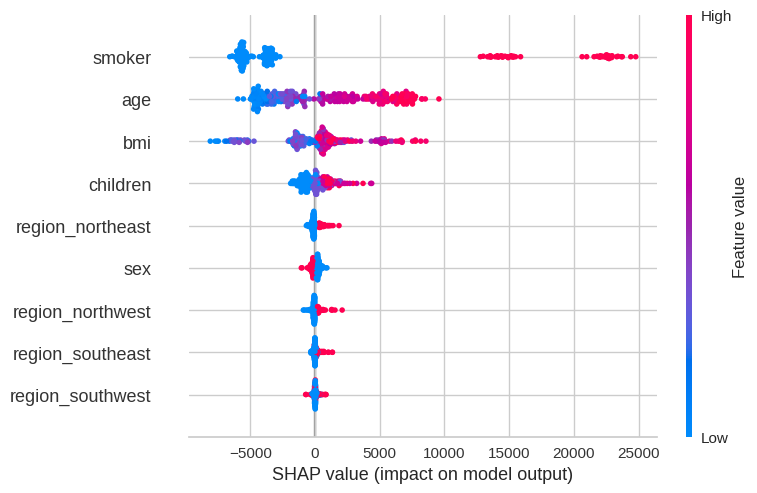

In [12]:
rf = create_model('rf')
interpret_model(rf)

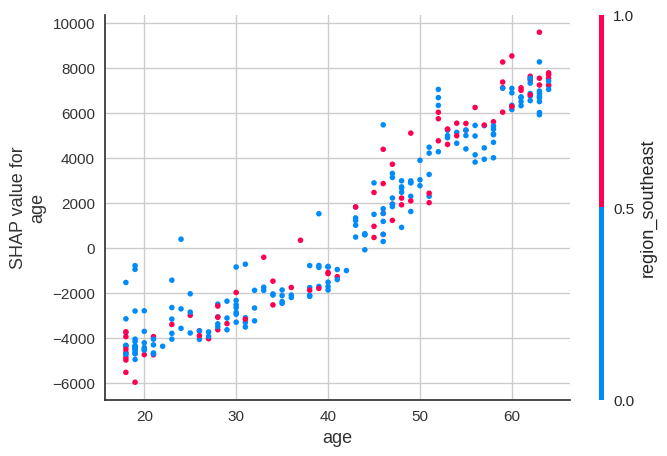

In [13]:
interpret_model(rf,plot='correlation', feature='age')